In [1]:
import pbjam as pb
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [7]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [8]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX

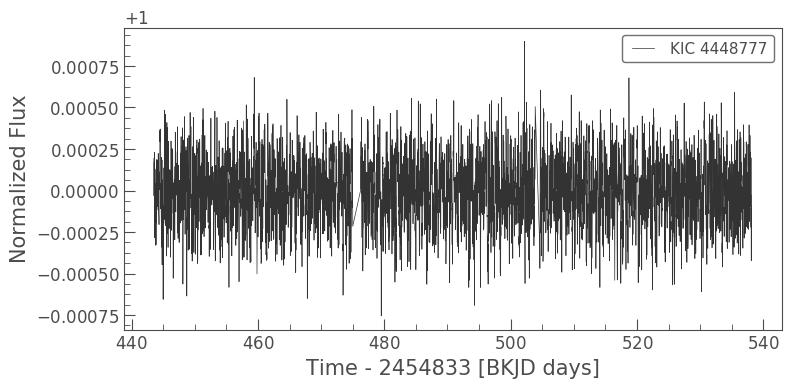

In [9]:
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

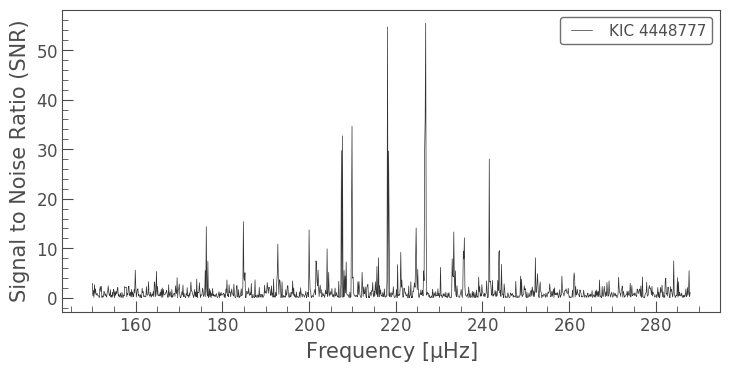

In [10]:
p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=288, min_frequency=150).flatten()
p.plot()

Epsilon from Vrard : (1.3781589243447712, 0.1)
16.96993616310835
1.3798451909141438 0.09822647449688747


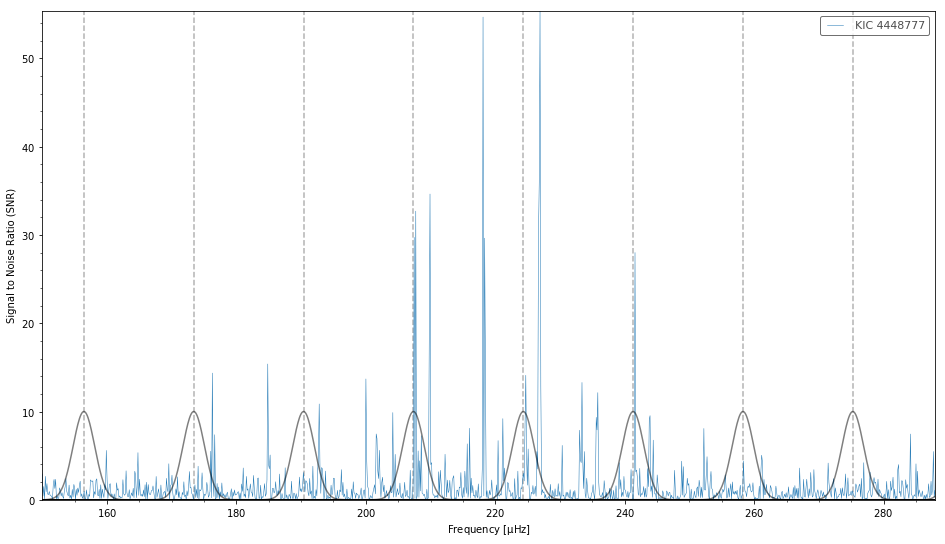

In [12]:
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')
ge_vrard.plot_vrard(dnu, p)

In [7]:
ge_kde = pb.epsilon(method='kde')
ep_kde = ge_kde(dnu, numax, teff)
print(f'Epsilon from kde : {ep_kde}')

Epsilon from kde : [1.3285379843652565, 0.08951948754953383]


In [8]:
n = np.arange(8,16)
f_vrard = (n + ep_vrard[0]) * dnu[0]
f_kde = (n + ep_kde[0]) * dnu[0]

(0, <Quantity 58.17908634>)

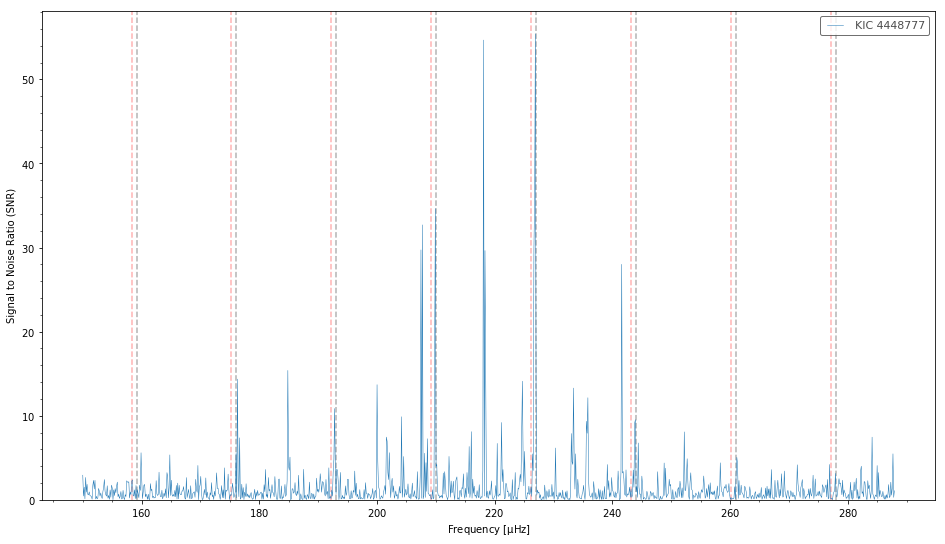

In [9]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
for i in range(len(n)):
    ax.axvline(f_vrard[i], c='k', linestyle='--', zorder=0, alpha=0.3)
    ax.axvline(f_kde[i], c='r', linestyle='--', zorder=0, alpha=0.3)
ax.set_ylim([0, p.power.max()*1.05])

In [10]:
x0 = [numax[0], dnu[0], 0.1, ep_kde[0], 0.03, 30, numax[0]*0.2, -1.0, 2.6]
asy = pb.mcmc(p.frequency.value, p.power.value, x0)
samples = asy(x0)

Burmingham
emcee: Exception while calling your likelihood function:
  params: [ 2.19877390e+02  1.69474316e+01  1.31292316e-01  1.38254545e+00
  5.76467909e-03  2.81980454e+01  4.40102603e+01 -8.25520223e-01
  2.90787423e+00]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/davies/.local/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/davies/Code/PBjam/pbjam/asy_peakbag.py", line 101, in likelihood
    mod = self.model(p[:-1]) # Last p is seff so ignore.
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
print(np.mean(samples, axis=0))
print(np.std(samples, axis=0))

In [ ]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
for i in range(len(n)):
    ax.axvline(f_vrard[i], c='k', linestyle='--', zorder=0, alpha=0.3)
    ax.axvline(f_kde[i], c='r', linestyle='--', zorder=0, alpha=0.3)
ax.set_ylim([0, p.power.max()*1.05])
model = asy.model(np.mean(samples, axis=0)[:-1])
ax.plot(asy.f[asy.sel], model)

In [ ]:
# TODO Add in code to peak bag all of the modes somehow!